<a href="https://colab.research.google.com/github/pradeepkudupudi/IIITH/blob/main/overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.8127 - loss: 0.6929 - val_accuracy: 0.9596 - val_loss: 0.1254
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9753 - loss: 0.0750 - val_accuracy: 0.9761 - val_loss: 0.0747
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9860 - loss: 0.0393 - val_accuracy: 0.9653 - val_loss: 0.1425
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9938 - loss: 0.0227 - val_accuracy: 0.9782 - val_loss: 0.0826
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9973 - loss: 0.0091 - val_accuracy: 0.9745 - val_loss: 0.1159
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9955 - loss: 0.0156 - val_accuracy: 0.9728 - val_loss: 0.1400
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9936 - loss: 0.0236 - val_accuracy: 0.9689 - val_loss: 0.1285
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9974 - loss: 0.0080 - val_

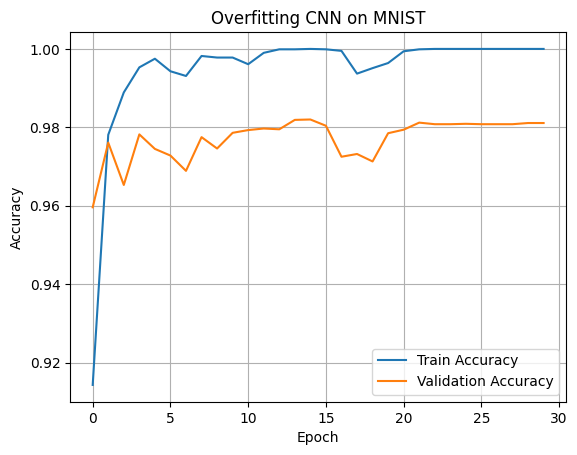

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Use a smaller dataset to encourage overfitting
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]

# Overfitting CNN
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train_small, y_train_small,
                    epochs=30,
                    batch_size=64,
                    validation_data=(X_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Overfitting CNN on MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
